In [1]:
## importing lbiraries & data

# import libraries
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "../Datasets"

import os
#Actual absolute path
cwd = os.getcwd()
#print(cwd)

In [3]:
# one level up directory. Datasets directory
os.chdir(path)
#Actual absolute path
cwd = os.getcwd()
#print(cwd)

In [4]:
# path file current dir + file name
path_file = cwd + '/new_churn_data.csv'
#print(path_file)

In [5]:
# import dataset

dataset = pd.read_csv(path_file)
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [6]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred'],
      dtype='object')

In [7]:
dataset.shape # 31 x columns - 27000 records

(26996, 28)

In [8]:
## Data preparation 
user_identifier = dataset['user']

#Remove the user from the dataset
dataset.drop(columns = ['user'])

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,37.0,na,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,0,28.0,R,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,0,35.0,R,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,0,26.0,R,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,1,27.0,na,0,0,2,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0
5,1,32.0,R,5,3,111,5,0,227,0,...,Bi-Weekly,0,0,0,0,Taurus,0,0,1.83,0
6,0,21.0,na,0,0,4,0,0,0,0,...,Bi-Weekly,0,0,0,0,Cancer,0,0,0.07,0
7,0,24.0,na,0,0,2,0,0,0,0,...,na,0,0,0,0,Leo,0,0,0.11,0
8,0,28.0,R,0,0,0,0,2,47,1,...,Bi-Weekly,0,0,0,0,Sagittarius,0,0,0.87,1
9,0,23.0,na,1,0,87,1,0,125,0,...,Bi-Weekly,0,0,0,0,Aquarius,0,0,1.07,0


In [9]:
# One-hot Encoding
dataset = pd.get_dummies(dataset)

#dataset.housing.value_counts()

In [10]:
# shows how many new columns have been created using the get_dummies function
dataset.columns

Index(['user', 'churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [11]:
# To avoid correlated variables we drop some columns
dataset = dataset.drop(columns = ['housing_na','zodiac_sign_na','payment_type_na'])

In [12]:
# spliting the dataset into Training and Test set
from sklearn.model_selection import train_test_split

# generate the datasets for training. Test 20%
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'),
                                                   dataset['churn'],
                                                   test_size = 0.2,
                                                   random_state = 0)

In [13]:
# balancing the training Set

#Counting and watching the Y_train distribution 
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [14]:
# The expecting distribution to avoid a Bias is to have a 50/50 (0/1)
#This balancing ensure that the model is accuracy

#pos and neg index values
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index
    
#Create random index selection
random.seed(0)
# random select index record up to the same size of lower index
higher = np.random.choice(higher, size = len(lower))
# select the lower index and convert to a numpy array
lower = np.asarray(lower)
# create the new index as a combination 
new_indexes = np.concatenate((lower,higher))

# Reselect the X_train, y_train dataset using the new indexes
X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

In [20]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
# generate an standarScalar
sc_X = StandardScaler()

#StandardScaler return a Numpy Array so we need to convert to a Dataframe
X_train2= pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

#copy columns name to the new traning and testing dataset
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

#copy index to the new traning and testing dataset
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

# reasigned copy dataset to original
X_train = X_train2
X_test = X_test2

In [26]:
### Model building ###

# Fitting Moel to the Traninig Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
# Evaluating Test set
y_pred = classifier.predict(X_test)

In [28]:
# Evaluating Result
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cnf_matrix = confusion_matrix(y_test, y_pred)

In [30]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.6116666666666667

In [31]:
# precision score (When is 0 and should be 1 and the other way round)
precision_score(y_test, y_pred)

0.5210187173979748

In [32]:
# recall score
recall_score(y_test, y_pred)

0.7600716204118174

In [33]:
f1_score(y_test, y_pred)

0.6182413981430912

Accuracy 0.6117


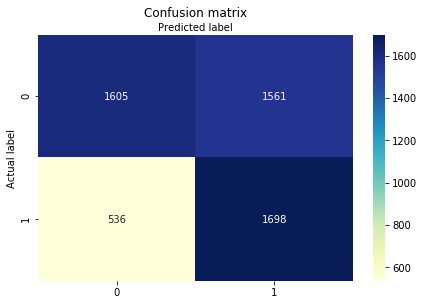

In [34]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy %0.4f" % accuracy_score(y_test, y_pred))

In [37]:
#Appliyng K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train,
                             y = y_train,
                             cv = 10)

# Showing Accuracies to validate the model estimation
accuracies

array([0.63534676, 0.65659955, 0.6689038 , 0.63087248, 0.64317673,
       0.64821029, 0.64876957, 0.65324385, 0.64205817, 0.65659955])

In [38]:
accuracies.mean()

0.6483780760626398

In [39]:
# Analyzing coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],
axis = 1)

,features,coef
0,user,-0.106080
1,age,-0.153150
2,deposits,0.488978
3,withdrawal,0.028536
4,purchases_partners,-0.737076
5,purchases,-0.619435
6,cc_taken,0.104137
7,cc_recommended,0.003659
8,cc_disliked,-0.030737
9,cc_liked,0.006419
